In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("data.csv")
target = pd.read_csv("target.csv")

In [6]:
# Step 2: Load Data (relative path since you are using VS Code)
data = pd.read_csv("data.csv")

# Drop unnamed index column if it exists
if "Unnamed: 0" in data.columns:
    data = data.drop(columns=["Unnamed: 0"])


In [7]:
X = data
y = target["Result"]

In [8]:
print(y)

0        0
1        0
2        1
3        0
4        0
        ..
13887    0
13888    0
13889    1
13890    1
13891    0
Name: Result, Length: 13892, dtype: int64


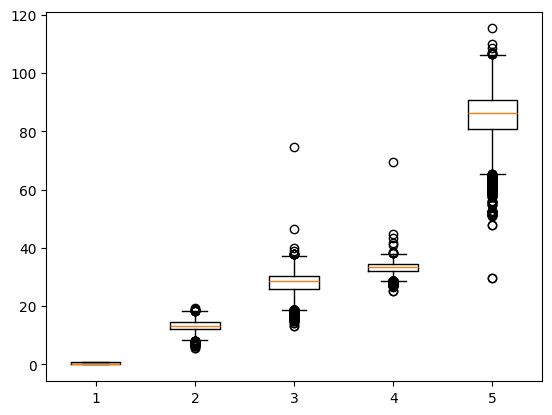

In [9]:
plt.boxplot(data)
plt.show()

In [10]:
X.head()

,Gender,Hemoglobin,MCH,MCHC,MCV
0,1,15.148357,23.236254,29.838467,83.554121
1,0,15.830868,25.217524,27.716110,71.970087
2,0,9.323844,21.080395,29.708388,71.446780
3,0,15.661515,15.477595,30.851349,87.645449
4,1,14.582923,21.016822,27.905567,98.502234


In [18]:
# Step 5: Initialize & Train Model with tuned parameters
model = LGBMClassifier(
    n_estimators=500,        # number of boosting rounds
    learning_rate=0.05,      # smaller learning rate for stability
    max_depth=6,             # limit depth to avoid overfitting
    num_leaves=31,           # default 31, increase for more complexity
    subsample=0.8,           # use 80% of data for each tree
    colsample_bytree=0.8,    # use 80% of features per tree
    reg_alpha=0.1,           # L1 regularization
    reg_lambda=0.1,          # L2 regularization
    random_state=42
)
model.fit(X, y)


[LightGBM] [Info] Number of positive: 5662, number of negative: 8230
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 13892, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.407573 -> initscore=-0.374009
[LightGBM] [Info] Start training from score -0.374009
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,6
,learning_rate,0.05
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [19]:
# # Step 5: Initialize & Train Model
# model = LGBMClassifier(random_state=42)
# model.fit(X_train, y_train)


In [20]:
# Step 2: Load Data (relative path since you are using VS Code)
test_data = pd.read_csv("testdata.csv").drop(columns=["Result"])
test_data_y = pd.read_csv("testdata.csv")["Result"]




In [21]:
test_data.head()

,Gender,Hemoglobin,MCH,MCHC,MCV
0,1,14.9,22.7,29.1,83.7
1,0,15.9,25.4,28.3,72.0
2,0,9.0,21.5,29.6,71.2
3,0,14.9,16.0,31.4,87.5
4,1,14.7,22.0,28.2,99.5


In [22]:
y_pred = model.predict(test_data)

In [23]:
# Step 7: Evaluation
print("✅ Accuracy:", accuracy_score(test_data_y, y_pred))
print("\n📊 Classification Report:\n", classification_report(test_data_y, y_pred))
print("\n🔍 Confusion Matrix:\n", confusion_matrix(test_data_y, y_pred))

✅ Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       801
           1       1.00      1.00      1.00       620

    accuracy                           1.00      1421
   macro avg       1.00      1.00      1.00      1421
weighted avg       1.00      1.00      1.00      1421


🔍 Confusion Matrix:
 [[801   0]
 [  0 620]]


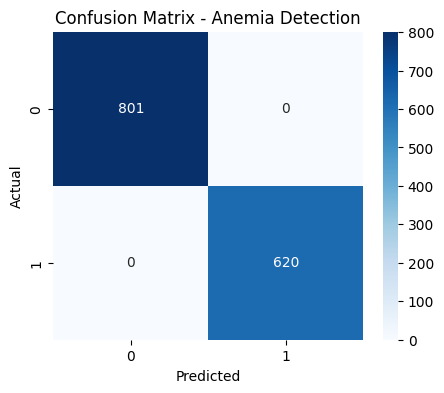

In [25]:
# Step 8: Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(test_data_y, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Anemia Detection")
plt.show()


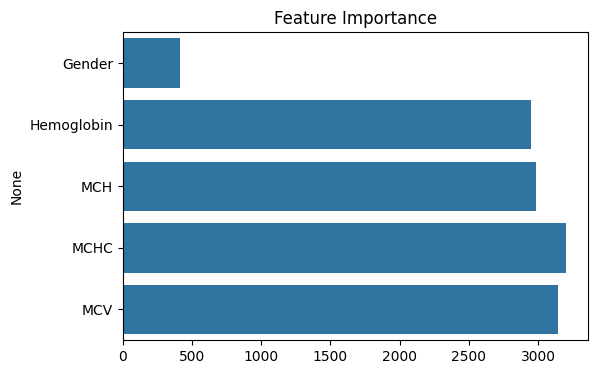

In [26]:
# Step 9: Feature Importance
plt.figure(figsize=(6,4))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()

In [27]:
# Step 10: Predict on New Data (Example)
sample = [[1, 12.5, 22.0, 30.0, 85.0]]  # Gender=1, Hb=12.5, MCH=22.0, MCHC=30.0, MCV=85.0
print("🔮 Predicted Result (0=No Anemia, 1=Anemia):", model.predict(sample)[0])

🔮 Predicted Result (0=No Anemia, 1=Anemia): 1


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
